ECONOMIC DATA ANALYSIS FOR BUSINESS INSIGHTS AND FORECASTING


This project takes a detailed look at sales and economic data to understand how different factors—like product types, customer demographics, and time of year—impact revenue and profit. It explores trends over time, identifies the most profitable products, and compares performance across countries. It also uses forecasting techniques to predict future economic patterns, helping businesses make smarter decisions based on real data.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
# =======<<<<<< Load Excel File >>>>>>=======
df = pd.read_excel("Cost_of_Living_Index_2022 (1).xlsx")


In [3]:
# Clean column names: remove extra spaces and replace spaces with underscores
df.columns = df.columns.str.strip().str.replace(' ', '_')

# Drop rows with missing main data
df.dropna(subset=['Country', 'Cost_of_Living_Index'], inplace=True)



In [4]:
# =======<<<<<< Convert Numeric Columns >>>>>>=======
for col in df.columns:
    if df[col].dtype == 'object':
        try:
            df[col] = df[col].str.replace(',', '').astype(float)
        except:
            continue


In [5]:
# Print summary
print("\nColumns in your data:\n", df.columns.tolist())
print("\nDescriptive Statistics:\n", df.describe())




Columns in your data:
 ['Rank', 'Country', 'Cost_of_Living_Index', 'Rent_Index', 'Cost_of_Living_Plus_Rent_Index', 'Groceries_Index', 'Restaurant_Price_Index', 'Local_Purchasing_Power_Index']

Descriptive Statistics:
              Rank  Cost_of_Living_Index  Rent_Index  \
count  139.000000            139.000000  139.000000   
mean    70.000000             50.188633   19.291511   
std     40.269923             20.860222   15.317726   
min      1.000000             19.920000    2.720000   
25%     35.500000             34.715000    9.515000   
50%     70.000000             44.680000   13.930000   
75%    104.500000             62.580000   25.070000   
max    139.000000            146.040000   98.580000   

       Cost_of_Living_Plus_Rent_Index  Groceries_Index  \
count                      139.000000       139.000000   
mean                        35.705324        46.637842   
std                         17.542523        20.952229   
min                         12.090000        14.92000

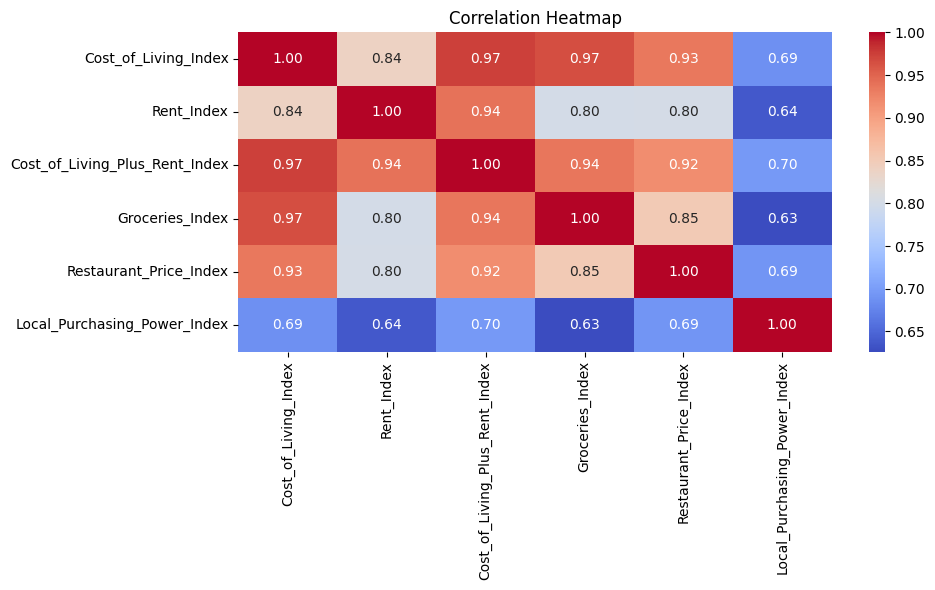

In [6]:
# Correlation heatmap for numeric data
correlation = df.select_dtypes(include=['float64']).corr()
plt.figure(figsize=(10, 6))
sns.heatmap(correlation, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Heatmap")
plt.tight_layout()
plt.show()


C:\Users\kalya\AppData\Local\Temp\ipykernel_22940\3953779579.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top10, x='Cost_of_Living_Index', y='Country', palette='viridis')


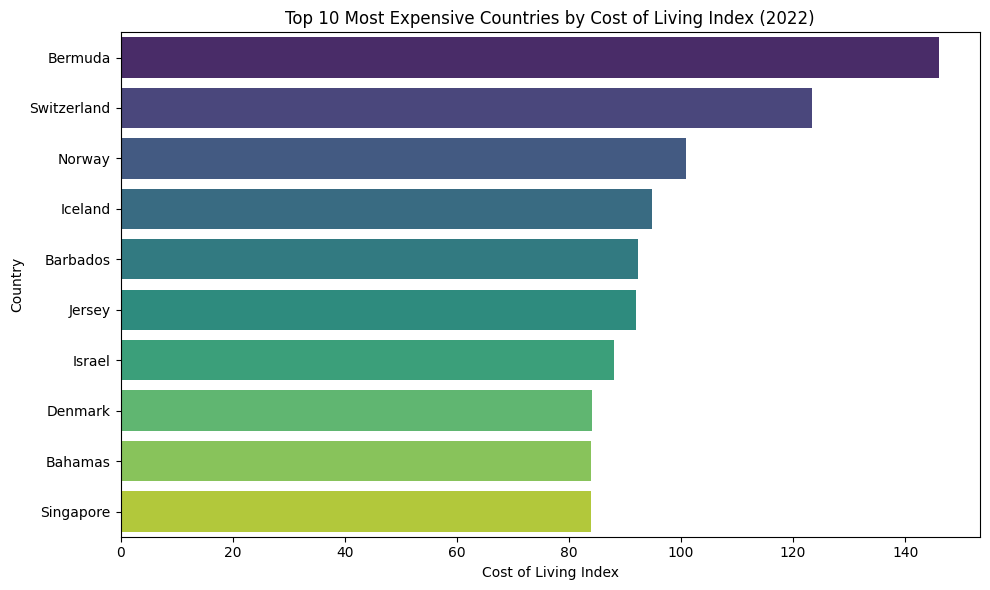

In [7]:
# =======<<<<<< Top 10 Expensive Countries >>>>>>=======
top10 = df[['Country', 'Cost_of_Living_Index']].sort_values(by='Cost_of_Living_Index', ascending=False).head(10)
plt.figure(figsize=(10, 6))
sns.barplot(data=top10, x='Cost_of_Living_Index', y='Country', palette='viridis')
plt.title("Top 10 Most Expensive Countries by Cost of Living Index (2022)")
plt.xlabel("Cost of Living Index")
plt.ylabel("Country")
plt.tight_layout()
plt.show()


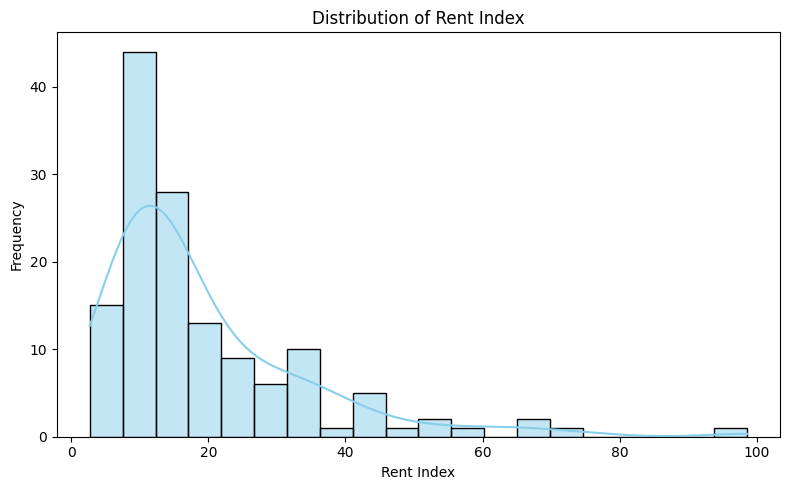

In [8]:
# Histogram: Distribution of Rent Index (if available)
if 'Rent_Index' in df.columns:
    plt.figure(figsize=(8, 5))
    sns.histplot(df['Rent_Index'], bins=20, kde=True, color='skyblue')
    plt.title("Distribution of Rent Index")
    plt.xlabel("Rent Index")
    plt.ylabel("Frequency")
    plt.tight_layout()
    plt.show()


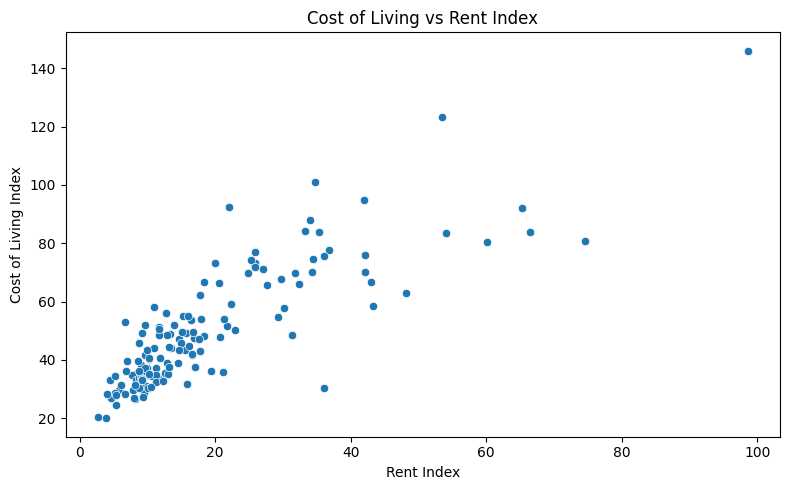

In [9]:
# Scatter plot of Rent vs Cost of Living
if 'Rent_Index' in df.columns:
    plt.figure(figsize=(8, 5))
    sns.scatterplot(data=df, x='Rent_Index', y='Cost_of_Living_Index')
    plt.title("Cost of Living vs Rent Index")
    plt.xlabel("Rent Index")
    plt.ylabel("Cost of Living Index")
    plt.tight_layout()
    plt.show()


In [10]:
# =======<<<<<< Save Cleaned Dataset >>>>>>=======
df.to_csv("Cleaned_Cost_of_Living_Data.csv", index=False)
print("\nCleaned data saved as: Cleaned_Cost_of_Living_Data.csv")


Cleaned data saved as: Cleaned_Cost_of_Living_Data.csv
